In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns

In [19]:
df = pd.read_csv('../DATA/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['class']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model_gbc = GradientBoostingClassifier()

param_grid = {'n_estimators': [50,100],
              'learning_rate': [0.1, 0.05, 0.2],
              'max_depth': [3,4,5]}

grid = GridSearchCV(estimator=model_gbc, param_grid=param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=50; total time=   0.3s
[CV] END ....learning_rate=0.1, max_depth=4, n_e

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]},
             verbose=2)

In [25]:
grid.best_params_   

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

[[444   0]
 [  1 368]]


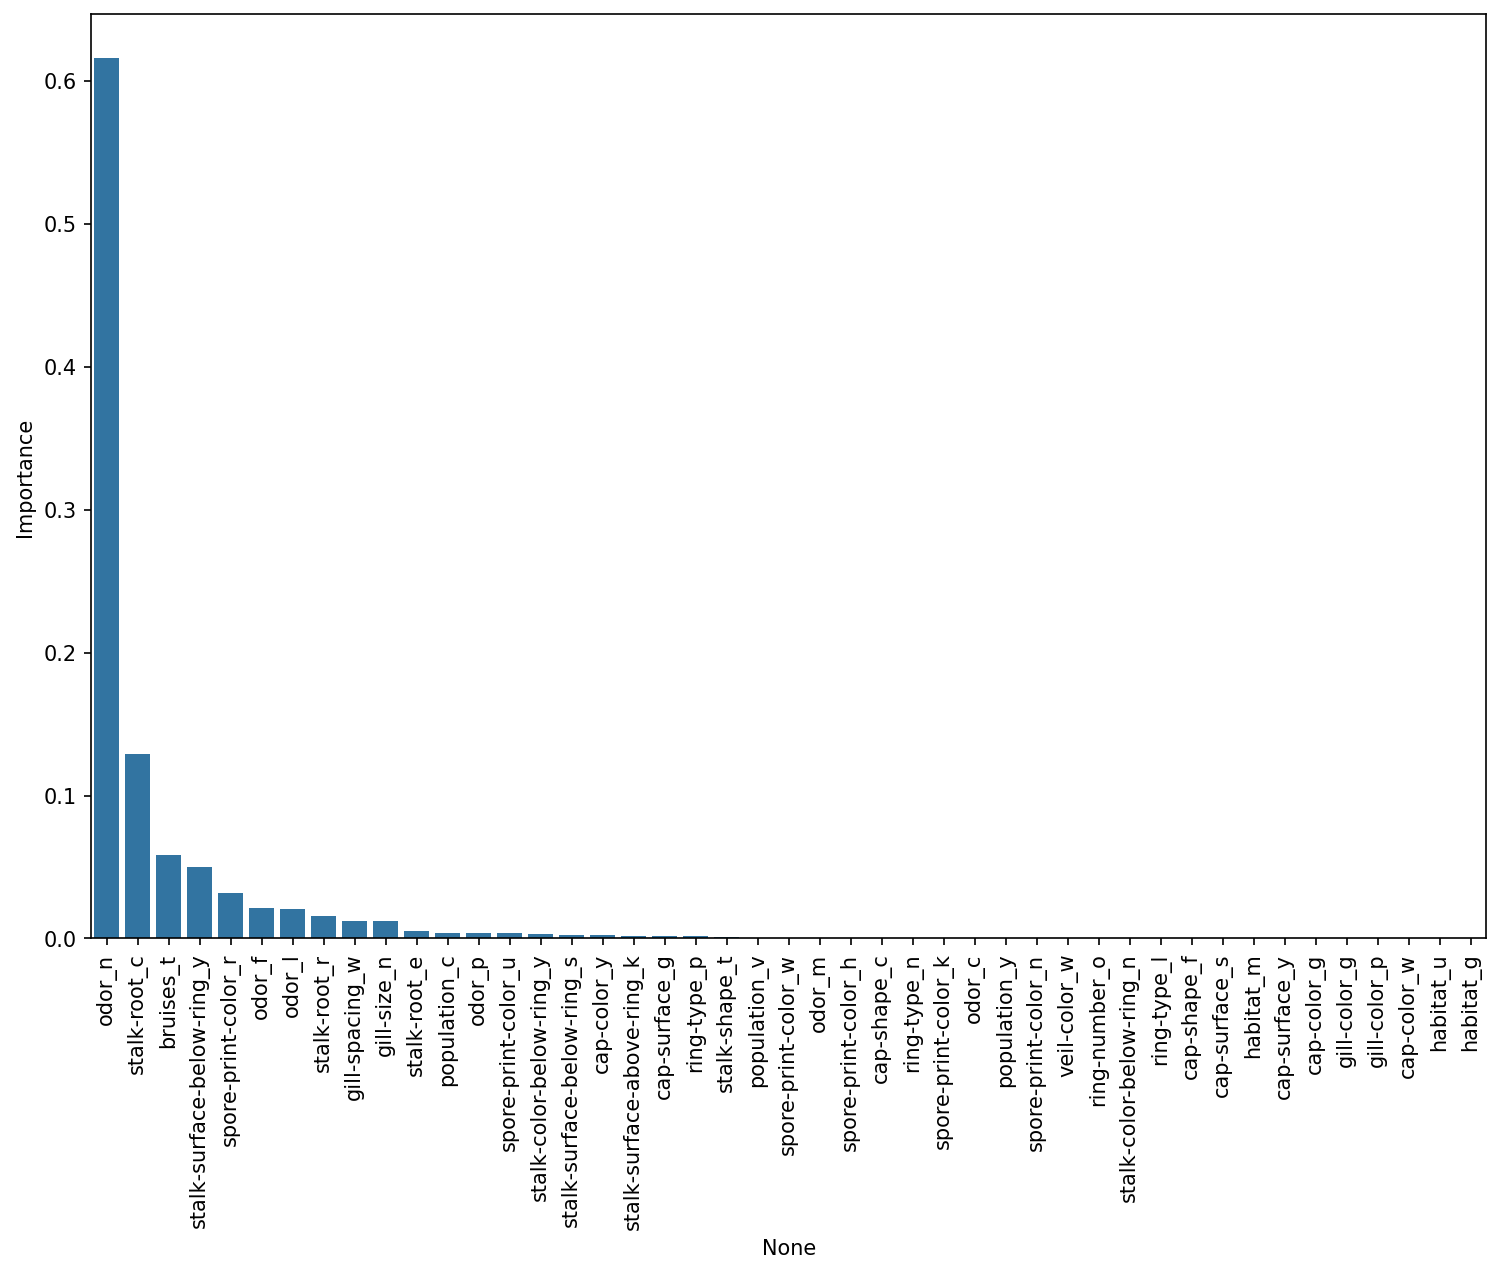

In [49]:
feat_import = pd.DataFrame(grid.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])
imp_feat = feat_import[feat_import['Importance'] > 0].sort_values('Importance', ascending=False)

plt.figure(figsize=(12,8), dpi=150)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')
plt.xticks(rotation=90);